In [1]:
import numpy as np
%matplotlib inline
from astropy import units
from astropy import constants
from astropy.table import Table
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 9
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size']  = 5 #12
plt.rcParams['ytick.major.size']  = 5#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 8
plt.rcParams['ytick.minor.size']  = 8

plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'
from matplotlib.gridspec import GridSpec



from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

custom_colors = ['#153243', '#284b63',
                 '#4d7ea8', #'#90a9c7',
                 #'#a1b4cf',
                 '#b6c2d9',
                '#ffffff', '#f5f5f5', #'#DFE2DF', '#E5D7B6',
                  '#EBCC8C', '#F7B538',
                 '#DB7C26', '#D8572A','#780116']#, '#242325']

pmap = LinearSegmentedColormap.from_list('', custom_colors)
pmap.reversed();

In [2]:

data2 = np.genfromtxt('dark_comet_data.csv',delimiter=',',dtype=str,usecols=np.arange(0,21))#,skip_header=14)


In [3]:
#a1 12 a2 15 a3 18
numobjects = 14
A2 = np.zeros(numobjects)
A1 = np.zeros(numobjects)
A3 = np.zeros(numobjects)
mag = np.zeros(numobjects)
TJ=np.zeros(numobjects)

a_DC= np.zeros(numobjects)
e_DC=np.zeros(numobjects)

cnt=0
dc_names=[]
for i in np.arange(2,len(data2)):
    try:
        if (np.abs(float(data2[i][17])) >2.5):
            A2[cnt]= float(data2[i][15])
    except:
        pass
    try:
        if (np.abs(float(data2[i][14])) >2.5):
            A1[cnt]= float(data2[i][12])
    except:
        pass
    try:
        if (np.abs(float(data2[i][20])) >2.5):
            A3[cnt]= float(data2[i][18])
    except:
        pass
    try:
        mag[cnt]=float(data2[i][7])
    except:
        pass
    try:
        TJ[cnt]=float(data2[i][6])
    except:
        pass
    try:
        a_DC[cnt]=float(data2[i][2])
    except:
        pass
    try:
        e_DC[cnt]=float(data2[i][3])
    except:
        pass
    dc_names.append(data2[i][1])
    cnt+=1


In [6]:
dat2 = Table.read('sbdb.csv', format='csv')
dat4 = Table.read('sbdb_comets_diameter.csv', format='csv')
conversion = 20.04

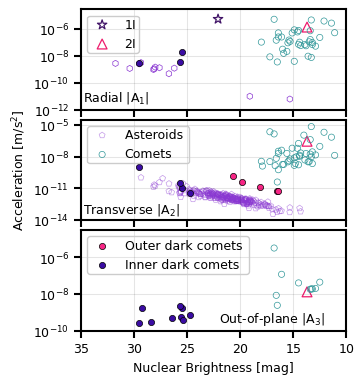

In [28]:
cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(3, 1, tight_layout=False,figsize=(8.7*cm,10.6*cm),sharex=True,sharey=False
                       ,gridspec_kw={'hspace': 0.1, 'wspace': 0.3})
conversion = 20.04
axs[0].grid(color='k',alpha=0.1)
axs[1].grid(color='k',alpha=0.1)
axs[2].grid(color='k',alpha=0.1)

Houm=22.08

m1_2i=13.7

#oumuamua
size1=50
axs[0].scatter(22.08,np.abs(2.8e-07)*conversion,
            c='none',marker='*',edgecolor= '#411467', lw=0.9,s=size1,label=r'1I')
#Borisov
axs[0].scatter(m1_2i,np.abs(7.1e-08)*conversion,
            c='none',marker='^',edgecolor= '#EE1B6C', lw=0.9,s=size1,label=r'2I')
axs[1].scatter(m1_2i,np.abs(-1.4e-08)*conversion,
            c='none',marker='^',edgecolor= '#EE1B6C', lw=0.9,s=size1)#,label=r'2I')
axs[2].scatter(m1_2i,np.abs(6.5e-10)*conversion,
            c='none',marker='^',edgecolor= '#EE1B6C', lw=0.9,s=size1)#,label=r'2I')

colors=['#BD4EF9', '#D90816', '#5B058A', '#F9626C']
size2=20
linewidth=0.5
axs[0].scatter(dat2['H'],np.abs(dat2['A1'])*conversion,
            c='none',marker='h',edgecolor= '#8A37D2', lw=linewidth,s=size2)#,label=r'Asteroids ')
axs[1].scatter(dat2['H'],np.abs(dat2['A2'])*conversion,
            c='none',marker='p',edgecolor= '#8A37D2', lw=linewidth,s=size2,label=r'Asteroids ',alpha=0.5)


axs[0].scatter(mag[(TJ<3.1) & (TJ>1)],np.abs(A1[(TJ<3.1) & (TJ>1)])*conversion,
            c='#f72585',marker='o',edgecolor= 'k', lw=linewidth,s=size2)#,label=r'Outer Dark Comets ')
axs[1].scatter(mag[(TJ<3.1) & (TJ>1)],np.abs(A2[(TJ<3.1) & (TJ>1)])*conversion,
            c='#f72585',marker='o',edgecolor= 'k', lw=linewidth,s=size2)#,label=r'Outer dark comets ')
axs[2].scatter(mag[(TJ<3.1) & (TJ>1)],np.abs(A3[(TJ<3.1) & (TJ>1)])*conversion,
            c='#f72585',marker='o',edgecolor= 'k', lw=linewidth,s=size2,label=r'Outer dark comets ')


axs[0].scatter(mag[(TJ>3.1)],np.abs(A1[(TJ>3.1)])*conversion,
            c='#3a0ca3',marker='o',edgecolor= 'k', lw=linewidth,s=size2)#,label=r'Inner Dark Comets ')
axs[1].scatter(mag[(TJ>3.1)],np.abs(A2[(TJ>3.1)])*conversion,
            c='#3a0ca3',marker='o',edgecolor= 'k', lw=linewidth,s=size2)#,label=r'Inner dark comets ')
axs[2].scatter(mag[(TJ>3.1)] ,np.abs(A3[(TJ>3.1)])*conversion,
            c='#3a0ca3',marker='o',edgecolor= 'k', lw=linewidth,s=size2,label=r'Inner dark comets ')

axs[0].scatter(dat4['M2'],np.abs(dat4['A1'])*conversion,
            c='none',marker='o',edgecolor= '#32989A', lw=linewidth,s=size2)#,label=r'Comets')
axs[1].scatter(dat4['M2'],np.abs(dat4['A2'])*conversion,
            c='none',marker='o',edgecolor= '#32989A', lw=linewidth,s=size2,label=r'Comets')
axs[2].scatter(dat4['M2'],np.abs(dat4['A3'])*conversion,
            c='none',marker='o',edgecolor= '#32989A', lw=linewidth,s=size2)#,label=r'Comets ')


axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[2].set_yscale('log')

fs=9
axs[1].set_ylabel('Acceleration [m/s$^2$]',fontsize=fs)
axs[2].set_xlabel('Nuclear Brightness [mag]',fontsize=fs)
axs[0].set_xlim([35,10])

axs[0].set_ylim([1e-12,3e-5])
axs[1].set_ylim([1e-14,3e-5])
axs[2].set_ylim([1e-10,3e-5])

#axs[0].set_title(r'Radial |A$_1$|',fontsize=fs)
#axs[1].set_title(r'Transverse |A$_2$|',fontsize=fs)
#axs[2].set_title(r'Out-of-plane |A$_3$|',fontsize=fs)
fs2=9
axs[0].annotate(r'Radial |A$_1$|',xy=(34.8,5e-12),fontsize=fs2)
axs[1].annotate(r'Transverse |A$_2$|',xy=(34.8,5e-14),fontsize=fs2)
axs[2].annotate(r'Out-of-plane |A$_3$|',xy=(22,3e-10),fontsize=fs2)



axs[0].legend(fancybox=True, framealpha=1, shadow=False, borderpad=.2,#bbox_to_anchor=(1.04,.3755),
            frameon=True, loc='upper left', ncol=1)#,prop={'size': 14},facecolor='none')
axs[1].legend(fancybox=True, framealpha=1, shadow=False, borderpad=.2,#bbox_to_anchor=(1.04,.3755),
            frameon=True, loc='upper left', ncol=1)#,prop={'size': 14},facecolor='none')

axs[2].legend(fancybox=True, framealpha=1, shadow=False, borderpad=.2,#bbox_to_anchor=(1.04,.3755),
            frameon=True, loc='upper left', ncol=1)#,prop={'size': 14},facecolor='none')
plt.savefig('Figure3_3Panel_Accelerations_Vector.pdf',
            format='pdf',bbox_inches='tight', dpi=600)



